<table width="100%">
    <tr>
        <td>
            <h2>CMSC197 (Data Science) - 2nd Miniproject (Item 2)</h2>
        </td>
    </tr>
    <tr>
        <td><b>Author:</b></td>
    </tr>
    <tr>
        <td><a href="https://github.com/3mYouOL/">Nelson Loumedes V. Villarta I</a></td>
    </tr>
    <tr>
        <td><b>Version:</b></td>
    </tr>
    <tr>
        <td>0.99</td>
    </tr>
    <tr>
        <td><b>Date:</b></td>
    </tr>
    <tr>
        <td>1/14/22</td>
    </tr>
</table>

In [1]:
# Import required libraries

library(dplyr)
library(lubridate)
library(ggplot2)
library(ggpubr)
library(scales)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [2]:
# Import required data from dataset file

data <- read.table("specdata/household_power_consumption.txt", header = TRUE, sep=";", na.strings = "?") %>%
    mutate(DateTime = dmy_hms(paste(Date, Time))) %>%
    filter(DateTime >= ymd("2007-02-01"), DateTime < ymd("2007-02-03"))

In [3]:
# Construct plot 1

plot1 <- data %>%
    select(Global_active_power) %>%
    ggplot(aes(x = Global_active_power)) +
        theme(panel.grid.major = element_blank()) +
        theme(panel.grid.minor = element_blank()) +
        theme(panel.background = element_blank()) +
        theme(axis.line = element_line(colour = "black")) +

        geom_histogram(bins=18, fill="red", color="black") +

        ggtitle("Global Active Power") +
        theme(plot.title = element_text(face="bold")) +
        theme(plot.title = element_text(hjust = 0.5)) +

        xlab("Global Active Power (kilowatts)") + 
        theme(axis.title.y = element_blank())

png 
  2

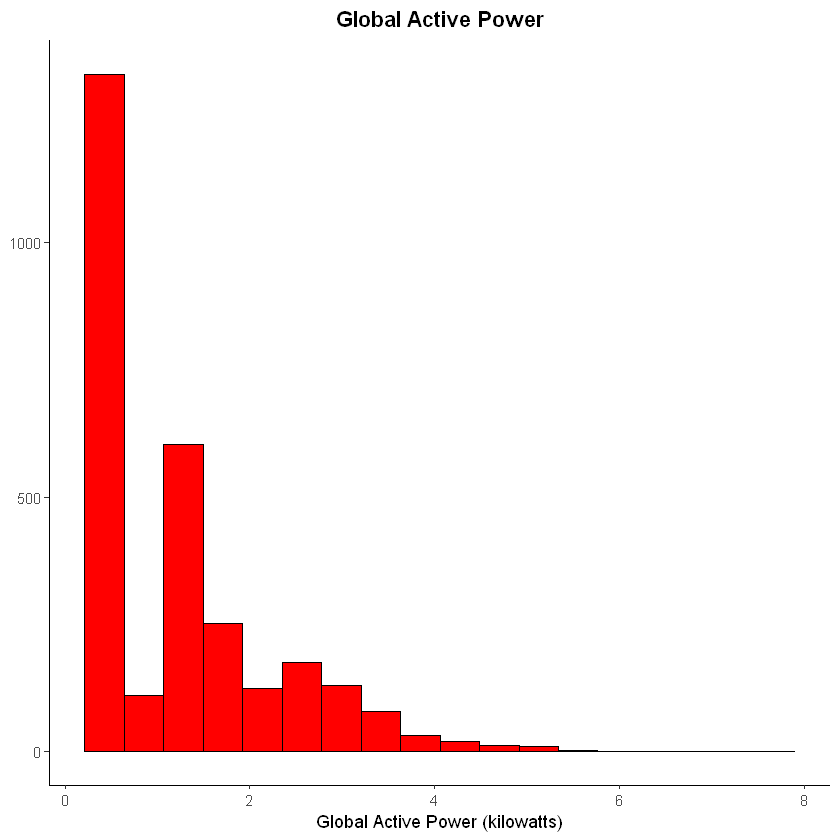

In [4]:
# Preview plot 1 and export as PNG

plot1

png(file = "plot1.png")
plot1
dev.off()

In [5]:
# Construct plot 2
plot2 <- data %>%
    select(Global_active_power, DateTime) %>%
    ggplot(aes(x = DateTime, y = Global_active_power)) +
        theme(panel.grid.major = element_blank()) +
        theme(panel.grid.minor = element_blank()) +
        theme(panel.background = element_blank()) +
        theme(axis.line = element_line(colour = "black")) +

        geom_line() +
        scale_x_datetime(labels = date_format("%A")) +

        ylab("Global Active Power (kilowatts)") + 
        theme(axis.title.x = element_blank())

png 
  2

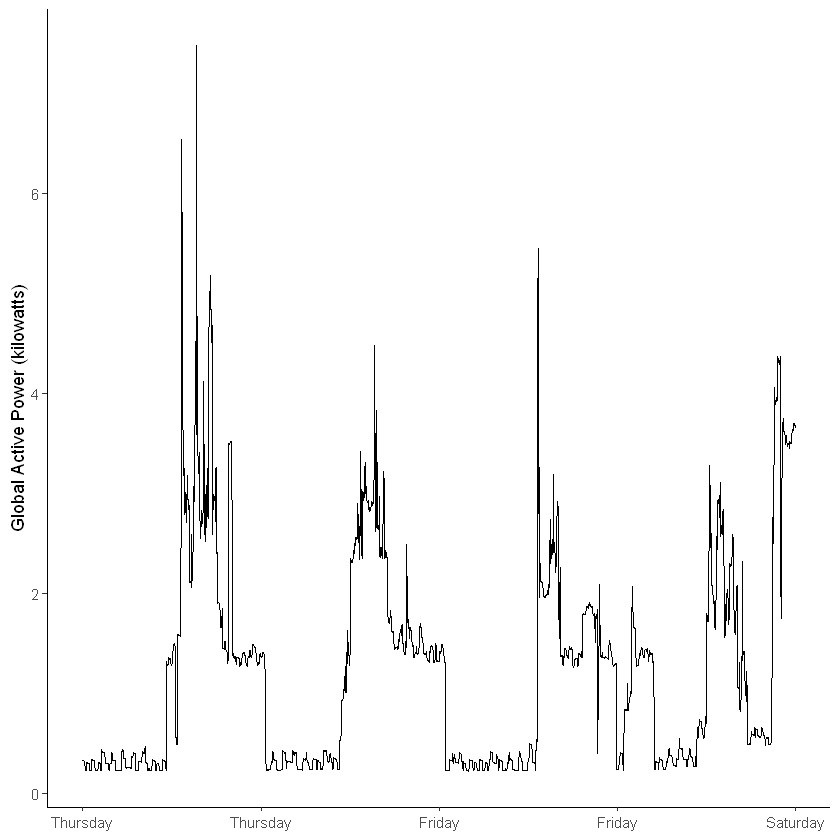

In [6]:
# Preview plot 2 and export as PNG

plot2

png(file = "plot2.png")
plot2
dev.off()

In [7]:
# Construct plot 3

plot3 <- data %>%
    select(Sub_metering_1, Sub_metering_2, Sub_metering_3, DateTime) %>%
    ggplot() + 
        theme(panel.grid.major = element_blank()) +
        theme(panel.grid.minor = element_blank()) +
        theme(panel.background = element_blank()) +
        theme(axis.line = element_line(colour = "black")) +

        geom_line(aes(x = DateTime, y = Sub_metering_1, colour = "Sub_metering_1")) +
        geom_line(aes(x = DateTime, y = Sub_metering_2, colour = "Sub_metering_2")) +
        geom_line(aes(x = DateTime, y = Sub_metering_3, colour = "Sub_metering_3")) +

        theme(legend.position = c(0.9, 0.95)) +
        theme(legend.title = element_blank()) +
        scale_color_manual(values = c("black", "red", "blue")) +
        scale_x_datetime(labels = date_format("%A")) +

        ylab("Energy sub metering") + 
        theme(axis.title.x = element_blank())

png 
  2

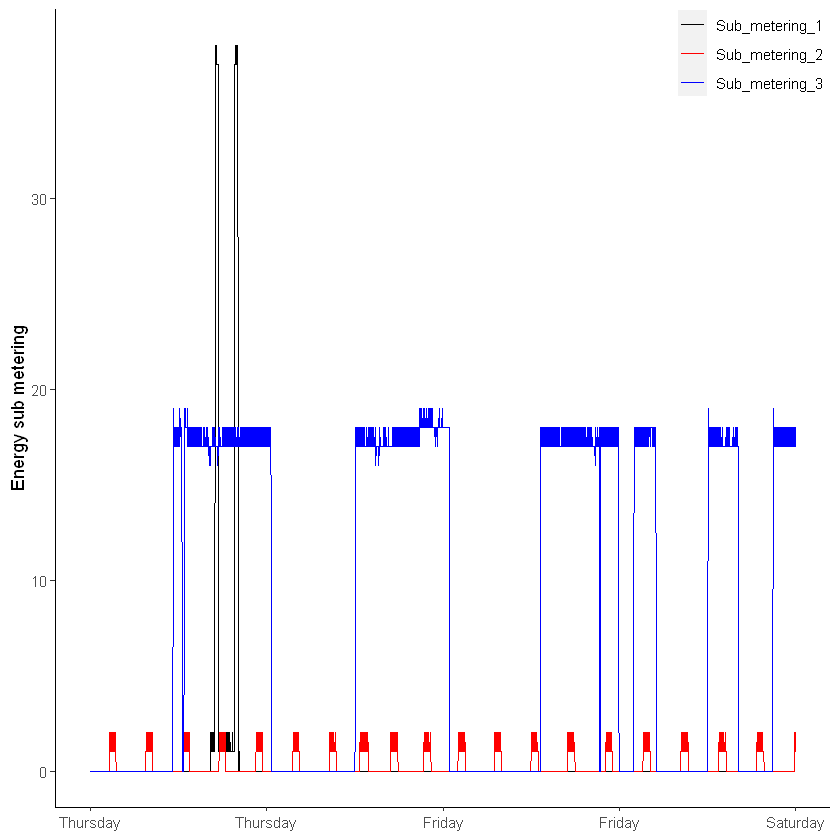

In [8]:
# Preview plot 3 and export as PNG

plot3

png(file = "plot3.png")
plot3
dev.off()

In [9]:
# Construct plot 4 subplot 2

plot4_2 <- data %>%
    select(Voltage, DateTime) %>%
    ggplot(aes(x = DateTime, y = Voltage)) +
        theme(panel.grid.major = element_blank()) +
        theme(panel.grid.minor = element_blank()) +
        theme(panel.background = element_blank()) +
        theme(axis.line = element_line(colour = "black")) +

        geom_line() +
        scale_x_datetime(labels = date_format("%A"))

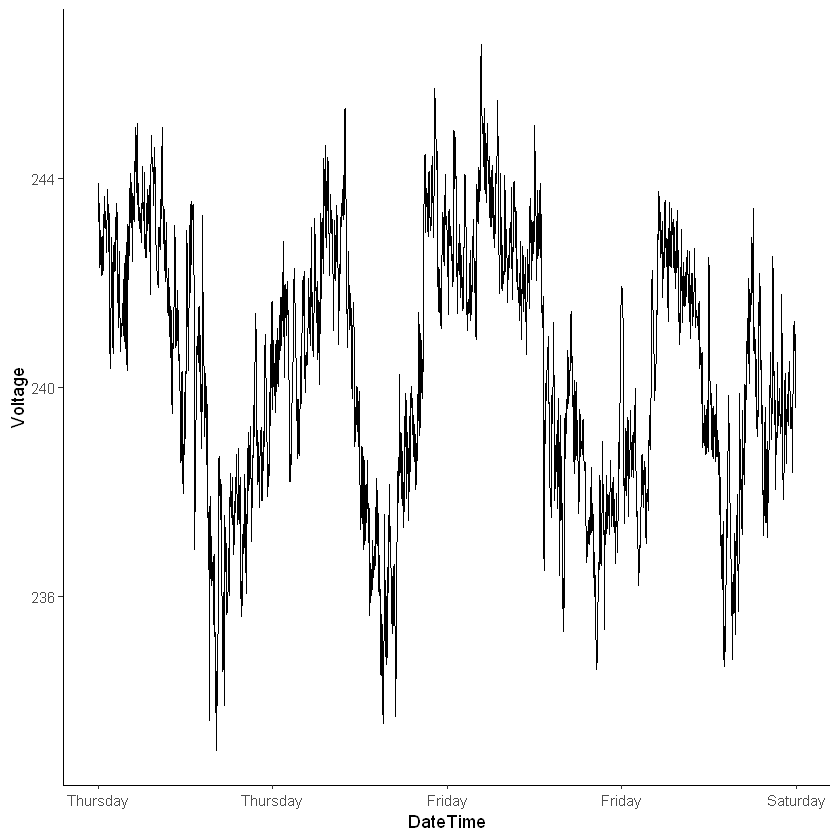

In [10]:
# Preview plot 4 subplot 2

plot4_2

In [11]:
# Construct plot 4 subplot 4

plot4_4 <- data %>%
    select(Global_reactive_power, DateTime, Date) %>%
    ggplot(aes(x = DateTime, y = Global_reactive_power)) +
        theme(panel.grid.major = element_blank()) +
        theme(panel.grid.minor = element_blank()) +
        theme(panel.background = element_blank()) +
        theme(axis.line = element_line(colour = "black")) +

        geom_line() +
        scale_x_datetime(labels = date_format("%A"))

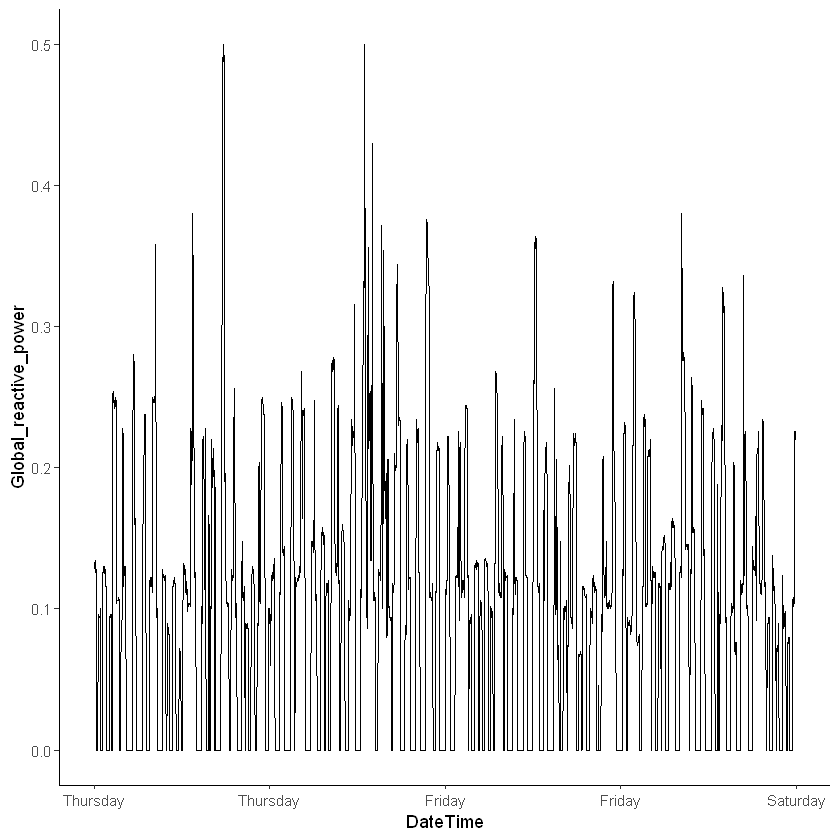

In [12]:
# Preview plot subplot 4

plot4_4

In [13]:
# Arrange subplots into a single plot

plot4 <- ggarrange(plot2 +
                       ylab("Global Active Power") +
                       theme(axis.title.x = element_text(color = "white")) +
                       theme(plot.margin = unit(c(0.75, 0.75, 0.75, 0.75), "cm")),
                   plot4_2 +
                       theme(plot.margin = unit(c(0.75, 0.75, 0.75, 0.75), "cm")),
                   plot3 + theme(legend.position = c(0.8, 0.9)) +
                       theme(axis.title.x = element_text(color = "white")) +
                       theme(plot.margin = unit(c(0.75, 0.75, 0.75, 0.75), "cm")),
                   plot4_4 +
                       theme(plot.margin = unit(c(0.75, 0.75, 0.75, 0.75), "cm")),
                   ncol = 2, nrow = 2)

png 
  2

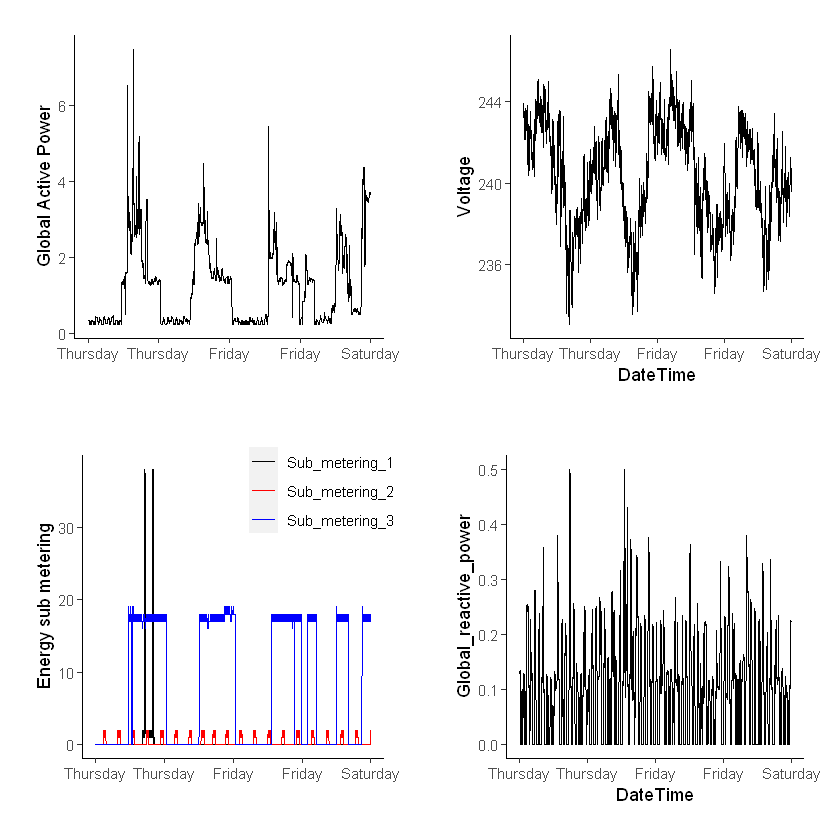

In [14]:
# Preview plot 4 and explort as PNG

plot4

png(file = "plot4.png")
plot4
dev.off()